In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PETAzs/PETAzs_testing_f1.csv'

pathToF1Ttraining = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PETAzs/PETAzs_training_f1.csv'

In [3]:
training_dt_f1 = pd.read_csv(pathToF1Ttraining, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)

In [4]:
medium = 0.4
good = 0.85
step = 8

In [5]:
#training_dt_f1 = training_dt_f1.sort_values(by='value', ascending=True)
#test_dt_f1 = test_dt_f1.sort_values(by='value', ascending=True)

In [6]:
intervalBadTraining = training_dt_f1[(training_dt_f1['value'] <= medium) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTraining = list(intervalBadTraining['key'])
listBadAttributesTraining.remove('learning_rate_605')
listBadAttributesTrainingPerformance = list(intervalBadTraining['value'])

intervalMediumTraining = training_dt_f1[(training_dt_f1['value'] > medium) & (training_dt_f1['value'] <= good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTraining = list(intervalMediumTraining['key'])
listMediumAttributesTrainingPerformance = list(intervalMediumTraining['value'])


intervalGoodTraining = training_dt_f1[(training_dt_f1['value'] > good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTraining = list(intervalGoodTraining['key'])
listGoodAttributesTrainingPerformance = list(intervalGoodTraining['value'])

In [7]:
def plotAttributes(listAttr, ds, listPerformance, tittle):
    for attribute in listAttr:
        valuesX = list(ds[ds['key'] == attribute]['value'])
        valuesY = list(ds[ds['key'] == attribute]['step'])
        plt.plot(valuesY, valuesX)
    
    classes = []
    for attrib, performance in zip(listAttr, listPerformance):
        classes.append( attrib + " - {:.2f}".format(performance))

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

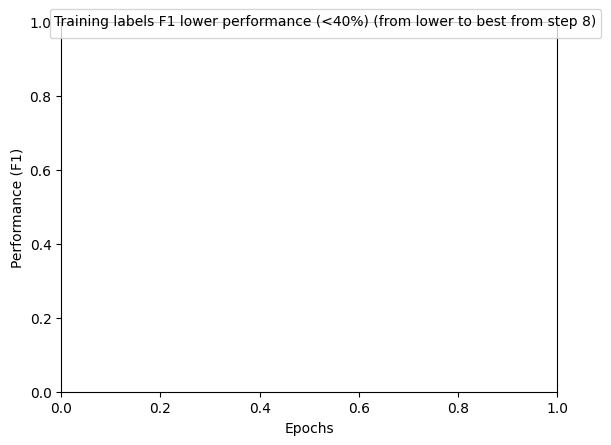

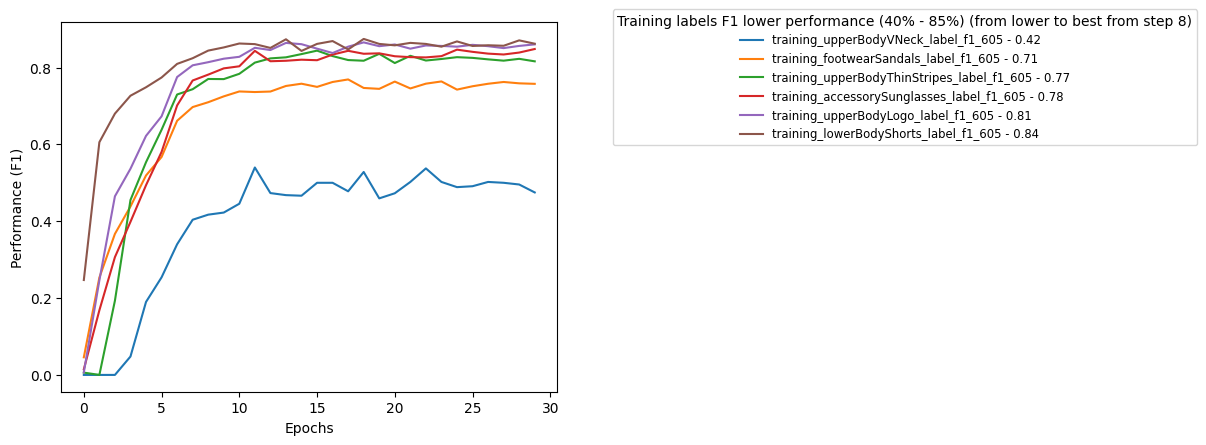

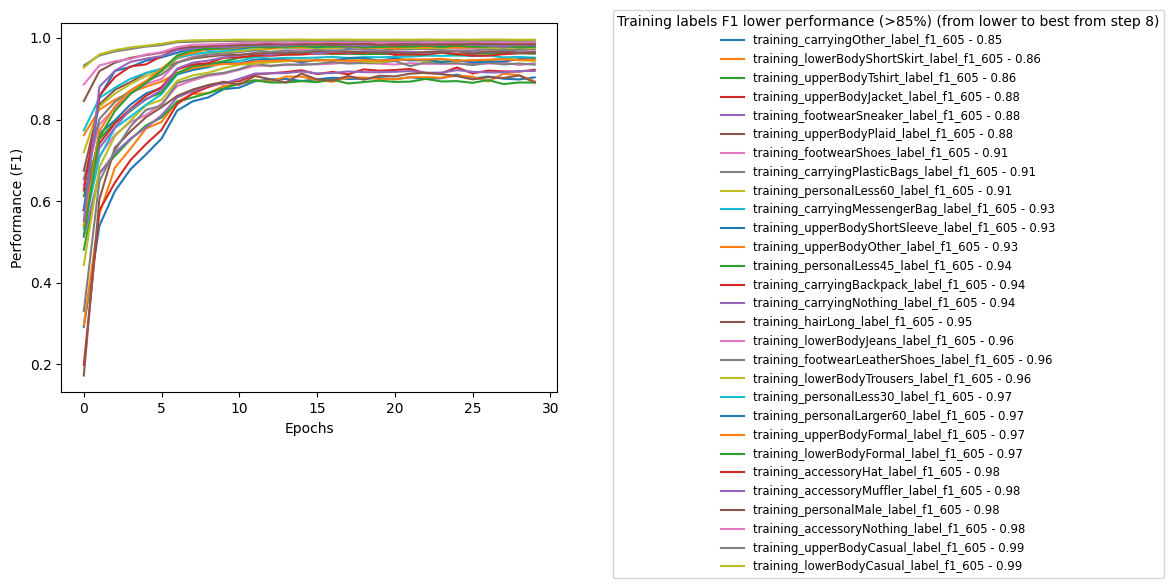

In [8]:
plotAttributes(listBadAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTraining, training_dt_f1, listMediumAttributesTrainingPerformance, "Training labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTraining, training_dt_f1, listGoodAttributesTrainingPerformance, "Training labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [9]:
intervalBadTesting = test_dt_f1[(test_dt_f1['value'] <= medium) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTesting = list(intervalBadTesting['key'])
listBadAttributesTesting.remove('learning_rate_605')
listBadAttributesTestingPerformance = list(intervalBadTesting['value'])

intervalMediumTesting = test_dt_f1[(test_dt_f1['value'] > medium) & (test_dt_f1['value'] <= good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTesting = list(intervalMediumTesting['key'])
listMediumAttributesTestingPerformance = list(intervalMediumTesting['value'])

intervalGoodTesting = test_dt_f1[(test_dt_f1['value'] > good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTesting = list(intervalGoodTesting['key'])
listGoodAttributesTestingPerformance = list(intervalGoodTesting['value'])

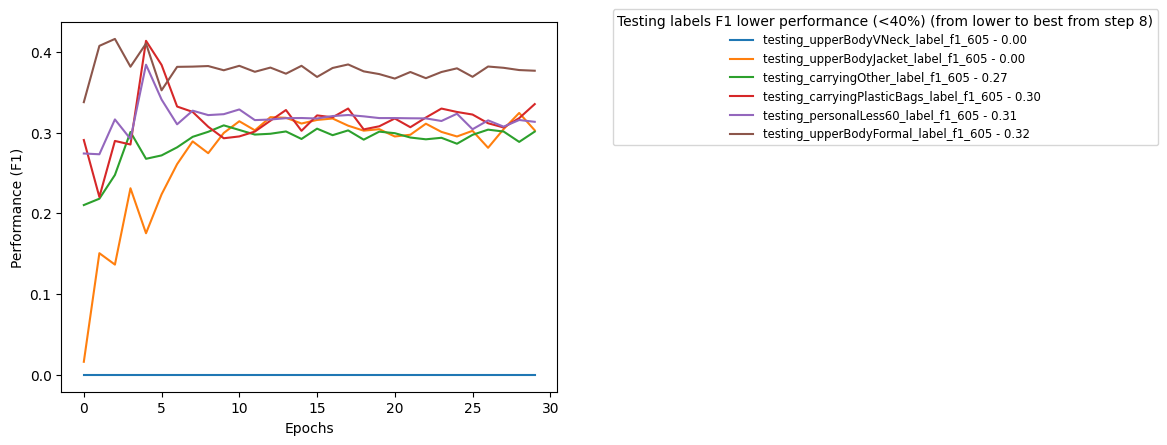

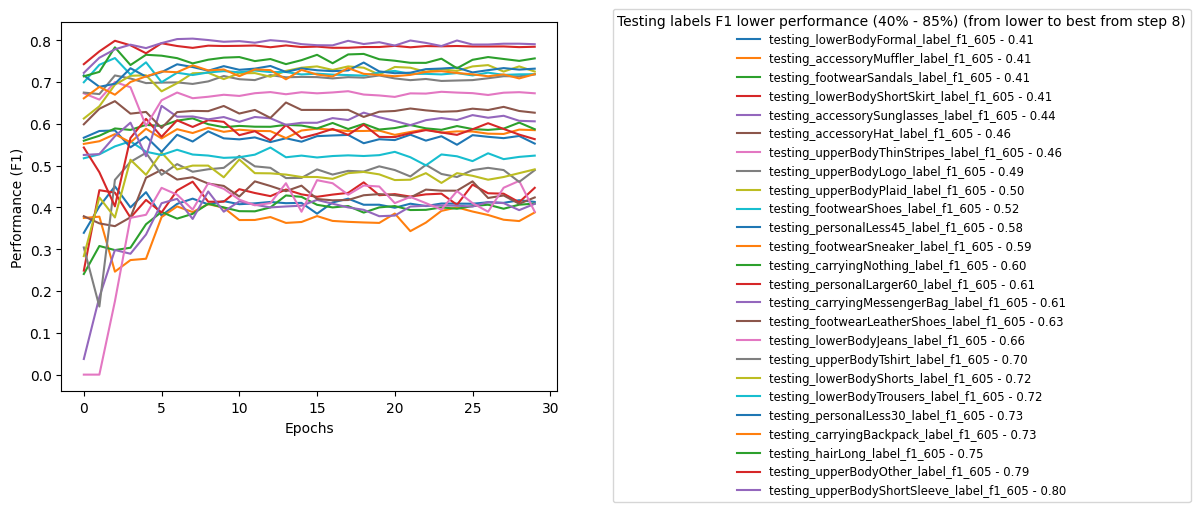

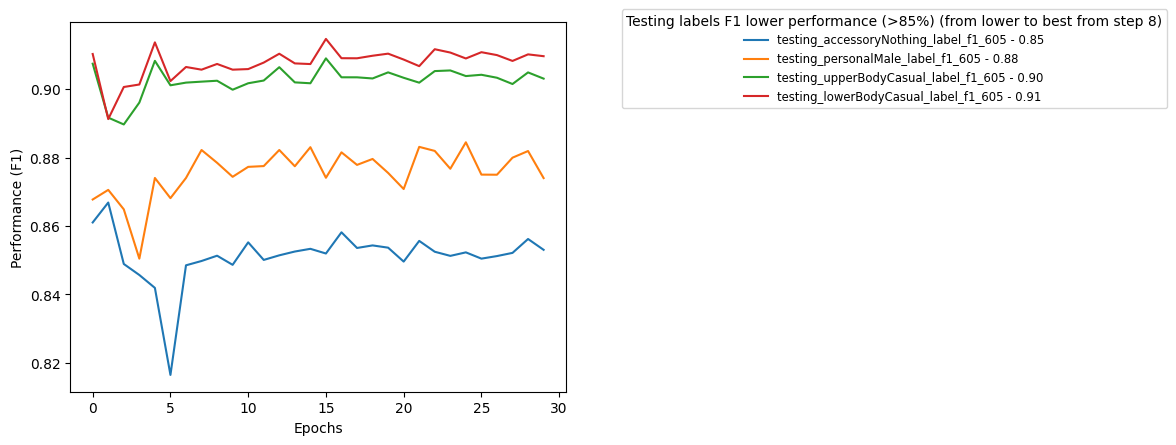

In [10]:
plotAttributes(listBadAttributesTesting, test_dt_f1, listBadAttributesTestingPerformance, "Testing labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTesting, test_dt_f1, listMediumAttributesTestingPerformance, "Testing labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTesting, test_dt_f1, listGoodAttributesTestingPerformance, "Testing labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [11]:
listAttributesPETA = ['accessoryHat','accessoryMuffler','accessoryNothing','accessorySunglasses','hairLong', 'upperBodyCasual', 'upperBodyFormal', 'upperBodyJacket', 'upperBodyLogo', 'upperBodyPlaid', 'upperBodyShortSleeve', 'upperBodyThinStripes', 'upperBodyTshirt','upperBodyOther','upperBodyVNeck','lowerBodyCasual', 'lowerBodyFormal', 'lowerBodyJeans', 'lowerBodyShorts', 'lowerBodyShortSkirt','lowerBodyTrousers','footwearLeatherShoes', 'footwearSandals', 'footwearShoes', 'footwearSneaker','carryingBackpack', 'carryingOther', 'carryingMessengerBag', 'carryingNothing', 'carryingPlasticBags','personalLess30','personalLess45','personalLess60','personalLarger60','personalMale']
listAttributesRAPzs = listAttributesPETA

In [12]:
tablaBadTesting = pd.DataFrame()
listBadAttributesTestingPerformance.remove(listBadAttributesTestingPerformance[0])
tablaBadTesting['attributes'] = listBadAttributesTesting
tablaBadTesting['performance'] = listBadAttributesTestingPerformance
tablaMediumTesting = pd.DataFrame()
tablaMediumTesting['attributes'] = listMediumAttributesTesting
tablaMediumTesting['performance'] = listMediumAttributesTestingPerformance
tablaGoodTesting = pd.DataFrame()
tablaGoodTesting['attributes'] = listGoodAttributesTesting
tablaGoodTesting['performance'] = listGoodAttributesTestingPerformance

tablaBadTraining = pd.DataFrame()
listBadAttributesTrainingPerformance.remove(listBadAttributesTrainingPerformance[0])
tablaBadTraining['attributes'] = listBadAttributesTraining
tablaBadTraining['performance'] = listBadAttributesTrainingPerformance

tablaMediumTraining = pd.DataFrame()
tablaMediumTraining['attributes'] = listMediumAttributesTraining
tablaMediumTraining['performance'] = listMediumAttributesTrainingPerformance

tablaGoodTraining = pd.DataFrame()
tablaGoodTraining['attributes'] = listGoodAttributesTraining
tablaGoodTraining['performance'] = listGoodAttributesTrainingPerformance

listPerfoTraining=[]
listPerfoTesting=[]
for attributeReal in listAttributesRAPzs:
    
    for attributeTraining in listBadAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listBadAttributesTrainingPerformance[listBadAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listMediumAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listMediumAttributesTrainingPerformance[listMediumAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listGoodAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listGoodAttributesTrainingPerformance[listGoodAttributesTraining.index(attributeTraining)]

    for attributeTesting in listBadAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listBadAttributesTestingPerformance[listBadAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listMediumAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listMediumAttributesTestingPerformance[listMediumAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listGoodAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listGoodAttributesTestingPerformance[listGoodAttributesTesting.index(attributeTesting)]
    
    listPerfoTraining.append(perfoTraining)
    listPerfoTesting.append(perfoTesting)



tablaAll = pd.DataFrame({'attribute': listAttributesRAPzs,
     'perfo training (F1)': listPerfoTraining,
     'perfo testing (F1)': listPerfoTesting
    })

In [13]:
import pickle
import easydict

fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/PETA/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)

maxAttributes = len(listAttributesRAPzs)
listTrainingCount = dataset.label[dataset.partition.train][:,:maxAttributes].sum(axis=0).tolist()
listTestingCount = dataset.label[dataset.partition.test][:,:maxAttributes].sum(axis=0).tolist()

In [14]:
tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount

In [15]:
tablaAll.sort_values(by='perfo testing (F1)')

,attribute,perfo training (F1),perfo testing (F1),training count,testing count
14,upperBodyVNeck,0.417062,0.000010,443,154
7,upperBodyJacket,0.879524,0.274406,9608,3417
26,carryingOther,0.854250,0.300874,1654,555
29,carryingPlasticBags,0.909892,0.307116,197,45
32,personalLess60,0.914626,0.321534,924,321
6,upperBodyFormal,0.972789,0.382231,9731,3393
16,lowerBodyFormal,0.973532,0.407336,6181,2104
1,accessoryMuffler,0.978792,0.407921,3754,1227
22,footwearSandals,0.709677,0.408759,773,383
19,lowerBodyShortSkirt,0.864384,0.413534,8367,3057
